# Uber Rider Churn Analysis

#  Project Overview

Uber is interested in predicting rider retention. To help explore this question, they have provided a sample dataset of a cohort of users.

## Cleaned Dataset Description

- city: city this user signed up in
    - city_King's Landing: this user signed up in *King's Landing*
    - city_Winterfell: this user signed up in *Winterfell*
    - city_Astapor: this user signed up in *Astapor*
- phone: primary device for this user
    - phone_Android: primary device for this user is Android
    - phone_iPhone: primary device for this user is iPhone
    - phone_no_phone: primary device for this user is unknown
- avg_dist: the average distance *(in miles) per trip taken in the first 30 days after signup 
- avg_rating_by_driver: the rider’s average rating over all of their trips 
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips 
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips 
- trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
- luxury_car_user: True if the user took an luxury car in their first 30 days; False otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday
- signup_dayofweek: what day of week users sign up
- churn: a user is regarded as churn if there is no trip made in last 30 days

## Load data and browse data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')

In [2]:
# Load data from file
df = pd.read_csv('data/cleaned_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null int64
weekday_pct               50000 non-null float64
city_Astapor              50000 non-null float64
city_King's Landing       50000 non-null float64
city_Winterfell           50000 non-null float64
phone_Android             50000 non-null float64
phone_iPhone              50000 non-null float64
phone_no_phone            50000 non-null float64
signup_dayofweek_0        50000 non-null float64
signup_dayofweek_1        50000 non-null float64
signup_dayofweek_2        50000 non-null float64
signup_dayofweek_3        50000 non-null float64
signup_dayofw

In [4]:
# Browse dataset
df.head(5)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,city_Astapor,city_King's Landing,...,phone_iPhone,phone_no_phone,signup_dayofweek_0,signup_dayofweek_1,signup_dayofweek_2,signup_dayofweek_3,signup_dayofweek_4,signup_dayofweek_5,signup_dayofweek_6,churn
0,3.67,5.0,4.7,1.10,15.4,4,1,46.2,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,8.26,5.0,5.0,1.00,0.0,0,0,50.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,0.77,5.0,4.3,1.00,0.0,3,0,100.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2.36,4.9,4.6,1.14,20.0,9,1,80.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,3.13,4.9,4.4,1.19,11.8,14,0,82.4,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [5]:
# Show summary stats
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,city_Astapor,city_King's Landing,...,phone_iPhone,phone_no_phone,signup_dayofweek_0,signup_dayofweek_1,signup_dayofweek_2,signup_dayofweek_3,signup_dayofweek_4,signup_dayofweek_5,signup_dayofweek_6,churn
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.779050,4.650038,1.074764,8.849536,2.278200,0.37708,60.926084,0.330680,0.202600,...,0.691640,0.007920,0.106860,0.102480,0.133760,0.138900,0.195340,0.194400,0.128260,0.623920
std,5.707357,0.445974,0.575601,0.222336,19.958811,3.792684,0.48466,37.081503,0.470463,0.401941,...,0.461821,0.088642,0.308938,0.303282,0.340398,0.345846,0.396466,0.395742,0.334382,0.484405
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,0.00000,33.300000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,0.00000,66.700000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,1.00000,100.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,1.00000,100.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Build Logistic Regression Model

### Define Features and Target

In [6]:
selected_features = [u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', u'avg_surge', 
                     u'surge_pct', u'trips_in_first_30_days', u'luxury_car_user', 
                     u'weekday_pct', u'city_Astapor', u'city_King\'s Landing',u'city_Winterfell', 
                     u'phone_Android', u'phone_iPhone', u'phone_no_phone']
target = u'churn'

In [19]:
X = df[selected_features].values
y = df['churn'].values

### Fit a Logistic Regression model using sklearn

#### Let's Train-test split the data!

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

#### Now train the model

In [10]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

# Initialize model by providing parameters
lr = LogisticRegression(C=100000, fit_intercept=True)

# initial an array recording prediction on test data
pred_list = list()

# Cross validation
kf = KFold(n_splits = 3,random_state = 1)
for train_index, val_index in kf.split(X_train):
    lr.fit(X[train_index], y[train_index])
    pred = lr.predict(X[val_index])
    pred_list.append(pred)

In [11]:
# convert prediction to an array
prediction = np.concatenate(pred_list, axis = 0)

In [12]:
"prediction on cross validaton is {0}".format(prediction)

'prediction on cross validaton is [0 1 1 ..., 0 1 1]'

In [23]:
# make predictions on test data set
prediction_test = lr.predict(X_test)

### Calculate the metric scores for the model

In [21]:
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [22]:
# Helper method to print metric scores
def print_results(y_true, y_pred):
    print("Accuracy of the Logistic Regression is: {}".format(accuracy_score(y_true, y_pred)))
    print("Precision of the Logistic Regression is: {}".format(precision_score(y_true, y_pred)))
    print("Recall of the Logistic Regression is: {}".format(recall_score(y_true, y_pred)))
    print("f1-score of the Logistic Regression is: {}".format(f1_score(y_true, y_pred)))

In [25]:
print("train data set scores:")
print_results(y_train, prediction)

train data set scores:
Accuracy of the Logistic Regression is: 0.559115789474
Precision of the Logistic Regression is: 0.62683175528
Recall of the Logistic Regression is: 0.725690579783
f1-score of the Logistic Regression is: 0.672648263357


In [26]:
print("test data set scores:")
print_results(y_test, prediction_test)

test data set scores:
Accuracy of the Logistic Regression is: 0.7092
Precision of the Logistic Regression is: 0.728285077951
Recall of the Logistic Regression is: 0.845507433743
f1-score of the Logistic Regression is: 0.782530661083


### Understanding the Estimated Coefficients

In [29]:
df_coeffs = pd.DataFrame(list(zip(selected_features, lr.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

,feature,coeff
8,city_Astapor,0.629150
11,phone_Android,0.421300
3,avg_surge,0.202144
1,avg_rating_by_driver,0.165994
10,city_Winterfell,0.135707
2,avg_rating_of_driver,0.120208
0,avg_dist,0.037814
7,weekday_pct,0.000236
4,surge_pct,-0.003894
13,phone_no_phone,-0.099180


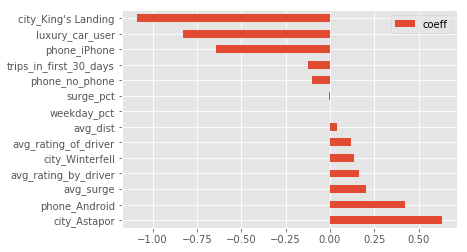

In [30]:
ax = df_coeffs.plot.barh()
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.show()

### How to interpret coefficient?

***Recall: Increasing the value of $x_i$ by 1 increases the odds ratio by a factor of $e^{\beta_i}$***

Say, for a given user, assume he has a probability to churn at 50%, or in another word, the odd ratio is 1:1 = 1

In [31]:
default_OR = 1 # 50% chance to churn

If a coefficient is 0.2, then, if we increase the corresponding variable by 1 unit, the new odd ratio will be:

In [33]:
beta = 0.2
increase = np.exp(beta)
OR = default_OR * increase
OR

1.2214027581601699

Which is can be converted to chance to churn:

In [34]:
p = OR / (1 + OR)
p

0.54983399731247795

If a coefficient is -0.4, then, if we increase the corresponding variable by 1 unit, the new odd ratio will be:

In [35]:
beta = -0.4
increase = np.exp(beta) * 1
OR = default_OR * increase
OR

0.67032004603563933

Which is can be converted to chance to churn:

In [36]:
p = OR / (1 + OR)
p

0.401312339887548

### More Model Evaluation

#### Confusion Matrix

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

In [40]:
# train_cfm = confusion_matrix(y_train, prediction)
# test_cfm = confusion_matrix(y_test, prediction_test)

In [43]:
# Helper method to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    '''
    Code from sklearn example.
    '''
    
    cm = confusion_matrix(y_true, y_pred)
    print cm
    # Show confusion matrix in a separate window
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

[[ 5042 12809]
 [ 8133 21516]]


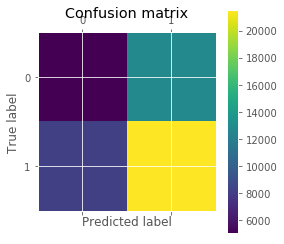

In [44]:
plot_confusion_matrix(y_train, prediction)

#### AUC

In [46]:
print("train set Area Under Curve (AUC) of the Logistic Regression is: {}".format(roc_auc_score(y_train, prediction)))
print("test set Area Under Curve (AUC) of the Logistic Regression is: {}".format(roc_auc_score(y_test, prediction_test)))

train set Area Under Curve (AUC) of the Logistic Regression is: 0.504069871148
test set Area Under Curve (AUC) of the Logistic Regression is: 0.666720138697


#### Classification report

In [47]:
print(classification_report(y_train, prediction))

             precision    recall  f1-score   support

          0       0.38      0.28      0.33     17851
          1       0.63      0.73      0.67     29649

avg / total       0.54      0.56      0.54     47500



#### Plot ROC curve

In [48]:
lr.predict_proba(X)

array([[ 0.84095634,  0.15904366],
       [ 0.0638519 ,  0.9361481 ],
       [ 0.28936716,  0.71063284],
       ..., 
       [ 0.23034037,  0.76965963],
       [ 0.31886165,  0.68113835],
       [ 0.0772009 ,  0.9227991 ]])

In [49]:
# Make predictions of the probability to be negative"/"not churn"/"0" vs "positive"/"churn"/"1", "
not_churn_pred_proba = lr.predict_proba(X)[:,1]

In [51]:
fpr, tpr, thresholds = roc_curve(y, not_churn_pred_proba)

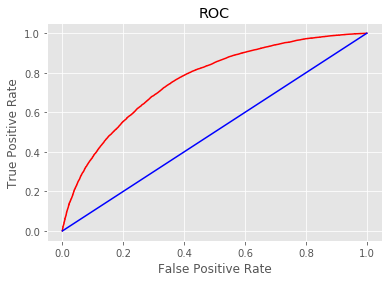

In [52]:
# plot TPR against FPR
plt.plot(fpr, tpr, color='red')

# plot 45 degree line
xx = np.linspace(0, 1.0, 20)
plt.plot(xx, xx, color='blue')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")

plt.show()

## Cost-benefit Analysis - Profit Curve

#### Uber uses sign up coupon to attract new riders
#### Uber also gives coupon to retain likely churning riders

### Q: How do we leverage our Logistic Regression model with business value?
### A: Cost-benefit Analysis

# Confusion matrix

|               |   Actual No    |    Actual Yes   |
| ------------- |:--------------:|:--------------:|
| Predicted No   | True negetive  | False positive |
| Predicted Yes  | False negetive | True positive  |

#### Let's define our cost-benefit matrix

|               |   Actual No   |   Actual Yes    |
| ------------- |:--------------:|:--------------:|
| Predicted No  |       0        |    lose 5       | 
| Predicted Yes |     lose 10    |        gain 10  |


#### Define cost-benefit matrix based on business input

In [55]:
costbenefit =  np.array([[0,-5],[-10, 10]])

In [53]:
def standard_confusion_matrix(y_true, y_predict):
    """Given y and predicted y, generate standard orientation
    
    Args:
    =====
    numpy array: y_true - array of true label
    numpy array: y_predict - array of predicted label
    
    Return:
    ======:
    numpy array: confusion matrix, 2x2 numpy array
    """
    return confusion_matrix(y_true, y_predict)

def profit_curve(cost_benefit_matrix, probabilities, y_true):
    """Given cost-benefit matrix, predicted probability, 
    and true label, calculate expected profit associated with 
    each threshold.
    
    Args:
    =====
    numpy array: cost_benefit_matrix, 2x2 array
    numpy array: probabilities - array of predicted probabilities
    numpy array: y_true - array of true label
    
    Return:
    ======:
    numpy array: threshold
    numpy array: profit
    """
    profit = list()
    thresholds = sorted(probabilities, reverse = True)
    # thresholds.sort()
    for ts in thresholds:
        y_predict = (probabilities >= ts).astype(int)
        con_max = confusion_matrix(y_true, y_predict)
        profit.append(np.sum(con_max * cost_benefit_matrix) / float(len(y_true)))
    return thresholds, profit

def plot_profit_model(profits, label="Logistic Regression"):
    """Plot profits against pertentage of test instance
    """
    percentages = np.linspace(0, 100, len(profits))
    plt.plot(percentages, profits, label=label)
    plt.title("Profit Curve")
    plt.xlabel("Percentage of test instances (decreasing by score)")
    plt.ylabel("Profit")
    plt.legend(loc='best')
    plt.savefig('profit_curve.png')
    plt.show()
    
def find_best_threshold(thresholds, profits):
    """Find the best threshold that gives max profit
    
    Args:
    =====
    numpy array: thresholds - array of sorted threshold
    numpy array: profits - array of profits
    
    Return:
    ======:
    float: threshold that corresponds to max profit
    float: max profit
    """
    opt_ind = profits.index(max(profits))
    return thresholds[opt_ind], max(profits)

#### Plot profit curve 

In [56]:
# Calculate expected profits corresponding to different threshold
thresholds, profits = profit_curve(costbenefit, not_churn_pred_proba, y)

In [ ]:
# Plot!
plot_profit_model(profits, label="Logistic Regression")

In [ ]:
max_threshold, max_profit = find_best_threshold(thresholds, profits)

#### Find the best threshold

In [ ]:
print("The best threshold is {}, which gives a max profit of {}".format(max_threshold, max_profit))

#### Make predictions with chosen threshold

In [ ]:
y_test_pred =  (lr.predict_proba(X_test)[:,1] >= max_threshold).astype(int)
print(classification_report(y_test, y_test_pred))